In [1]:
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd
import xlrd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
emp=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [4]:
emp=emp.drop('EmpNumber',axis=1)

In [31]:
emp.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,2,12,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,5,21,...,0,0,0,0,1,0,0,1,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,1,1,0,1,0
4,60,16,4,1,84,3,2,1,8,14,...,0,0,0,0,0,1,1,0,1,0


In [5]:
emp.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [6]:
#making a copy of the dataframe as backup
emp1=emp.copy()

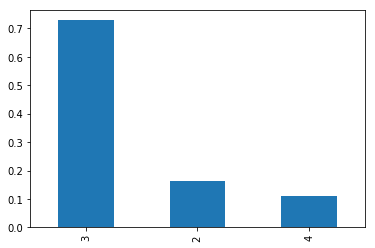

In [7]:
#exploring the target column
#normalizing the no.of employees for each rating in percentages with the help of normalize option
emp.PerformanceRating.value_counts(normalize=True).plot(kind='bar')

In [8]:
#getting datatypes of each column
emp.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

In [9]:
#making a list of character datatype columns
cat_cols=emp.select_dtypes(include=['object']).columns.tolist()

In [10]:
cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [11]:
num_cols=emp1.drop(cat_cols,axis=1).columns.tolist()

In [12]:
num_cols

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [13]:
num_cols.remove('PerformanceRating')

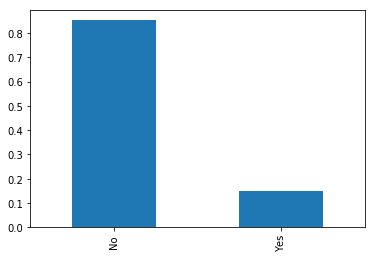

In [14]:
emp.Attrition.value_counts(normalize=True).plot(kind='bar')

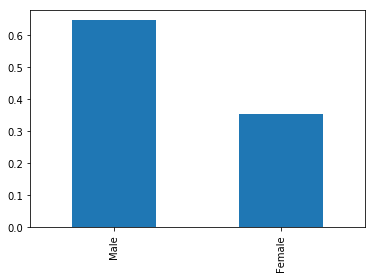

In [15]:
emp.Gender[(emp.Attrition=='Yes')].value_counts(normalize=True).plot(kind='bar')

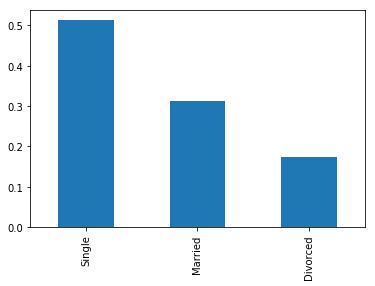

In [16]:
emp.MaritalStatus[(emp.Attrition=='Yes') & (emp.Gender=='Male')].value_counts(normalize=True).plot(kind='bar')

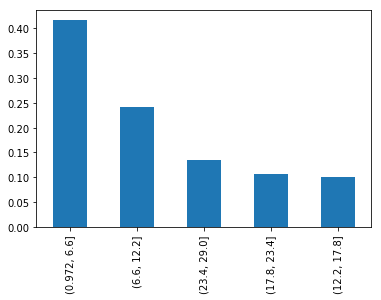

In [18]:
emp['DistanceFromHome1']=pd.cut(emp.DistanceFromHome,bins=5)
emp.DistanceFromHome1[(emp.Attrition=='Yes')].value_counts(normalize=True).plot(kind='bar')

In [19]:
emp.DistanceFromHome1.unique()

[(6.6, 12.2], (12.2, 17.8], (0.972, 6.6], (23.4, 29.0], (17.8, 23.4]]
Categories (5, interval[float64]): [(0.972, 6.6] < (6.6, 12.2] < (12.2, 17.8] < (17.8, 23.4] < (23.4, 29.0]]

### Department Wise Analysis

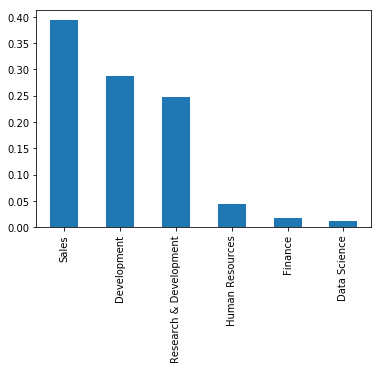

In [20]:
# Department wise analysis of attrition in percentages
emp.EmpDepartment[emp.Attrition=="Yes"].value_counts(normalize=True).plot(kind='bar')

In [21]:
#replacing OverTime values to 1 and 0 for Yes and No respectively
emp['OverTime1']=emp.OverTime.replace({'Yes':1,'No':0})

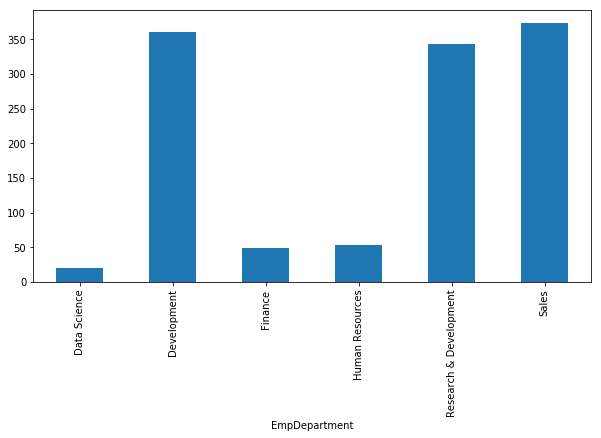

In [22]:
#checking the average EmpLastSalaryHikePercent department wise
emp.groupby('EmpDepartment')['OverTime'].count().plot(kind='bar',figsize=(10,5))

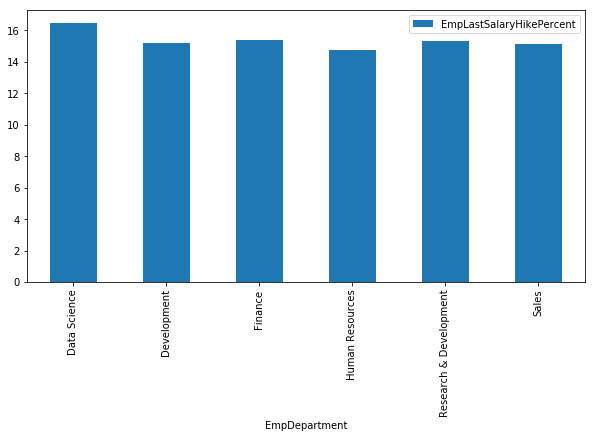

In [23]:
#checking the average EmpLastSalaryHikePercent department wise
emp.groupby('EmpDepartment')['EmpDepartment','EmpLastSalaryHikePercent'].mean().plot(kind='bar',figsize=(10,5))

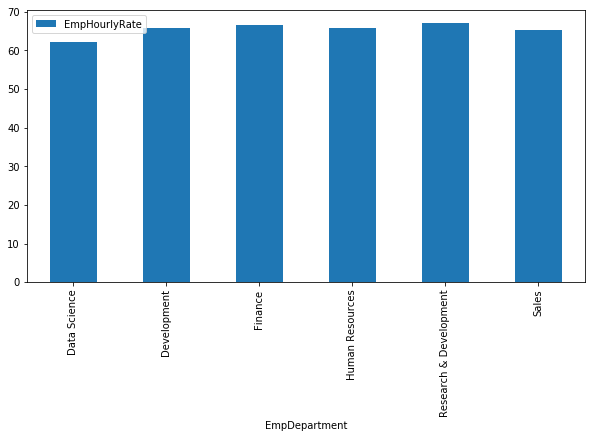

In [24]:
#checking the average EmpHourlyRate department wise
emp.groupby('EmpDepartment')['EmpDepartment','EmpHourlyRate'].mean().plot(kind='bar',figsize=(10,5))

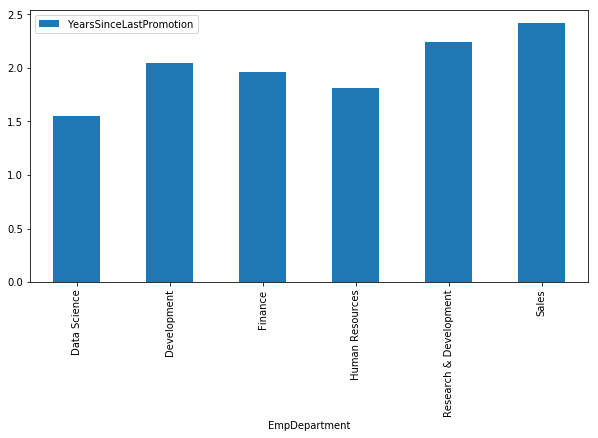

In [25]:
#checking the average YearsSinceLastPromotion department wise
emp.groupby('EmpDepartment')['EmpDepartment','YearsSinceLastPromotion'].mean().plot(kind='bar',figsize=(10,5))


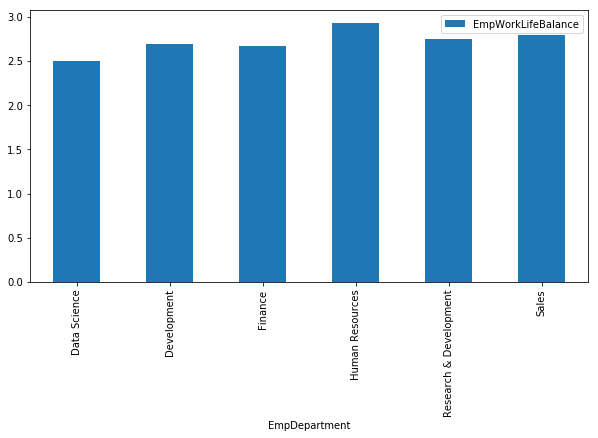

In [26]:
#checking the average EmpWorkLifeBalance department wise
emp.groupby('EmpDepartment')['EmpDepartment','EmpWorkLifeBalance'].mean().plot(kind='bar',figsize=(10,5))


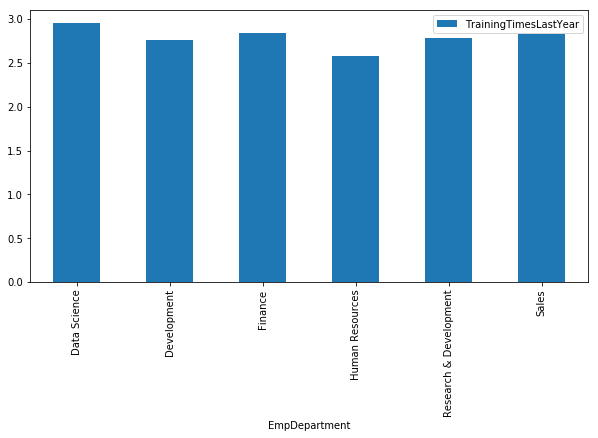

In [27]:
#checking the average TrainingTimesLastYear department wise
emp.groupby('EmpDepartment')['EmpDepartment','TrainingTimesLastYear'].mean().plot(kind='bar',figsize=(10,5))


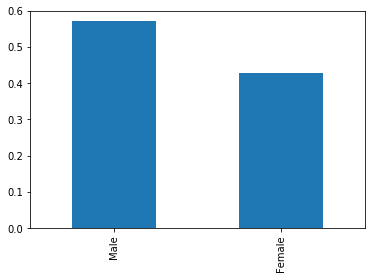

In [28]:
emp.Gender[(emp.Attrition=='Yes') & (emp.EmpDepartment=='Sales')].value_counts(normalize=True).plot(kind='bar')

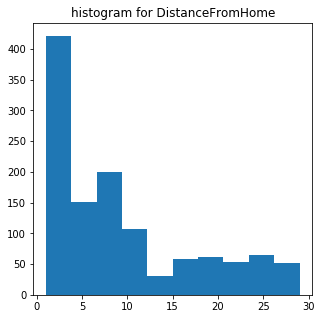

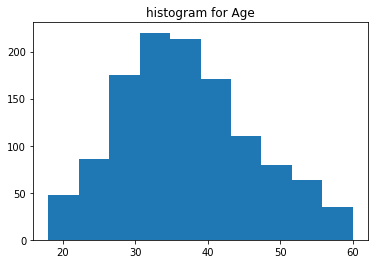

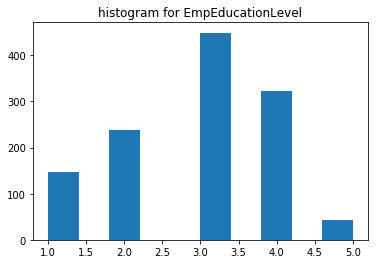

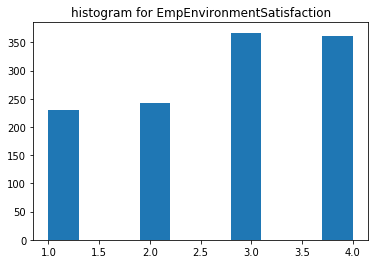

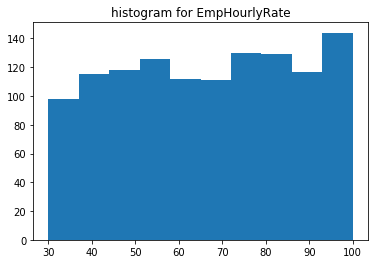

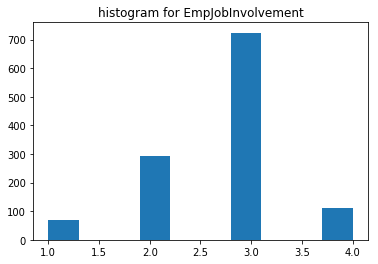

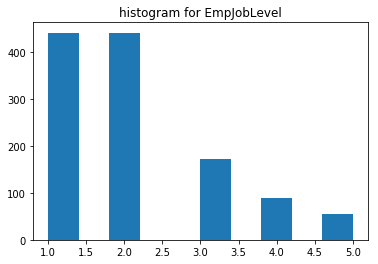

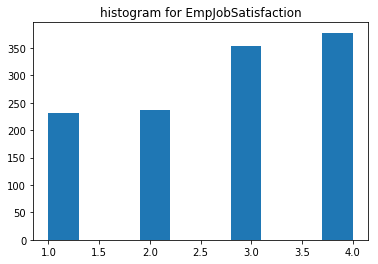

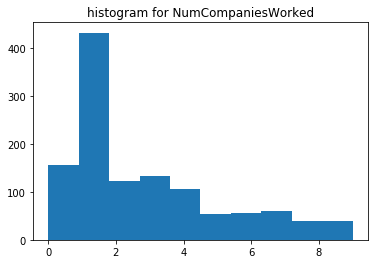

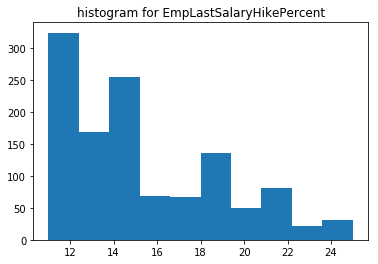

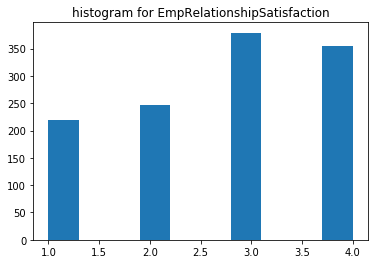

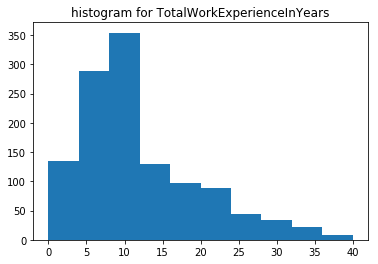

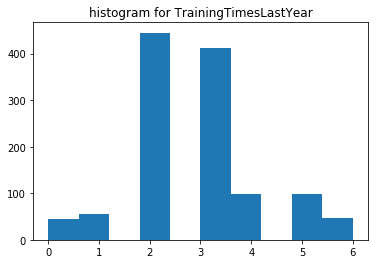

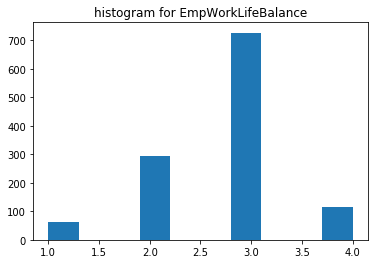

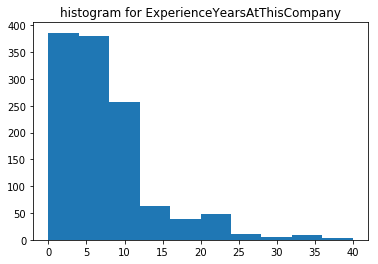

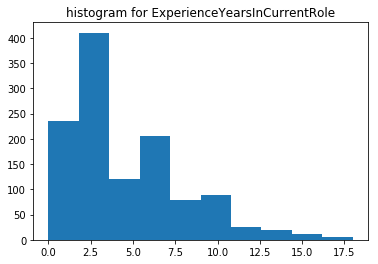

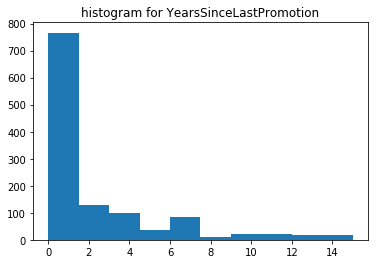

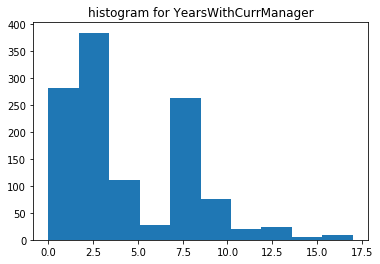

In [29]:
plt.figure(figsize=(5,5))
for i,col in enumerate(num_cols):
    plt.figure(i)
    plt.title("histogram for %s"%col)
    plt.hist(emp[col])

In [30]:
emp=pd.get_dummies(emp,columns=cat_cols)

In [192]:
emp1.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,0,0,0,0,0,1,1,0,1,0
1,47,14,4,4,42,3,2,1,2,12,...,0,0,0,0,0,1,1,0,1,0
2,40,5,4,4,48,2,3,1,5,21,...,0,0,0,0,1,0,0,1,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,1,1,0,1,0
4,60,16,4,1,84,3,2,1,8,14,...,0,0,0,0,0,1,1,0,1,0


In [35]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 64 columns):
Age                                          1200 non-null int64
DistanceFromHome                             1200 non-null int64
EmpEducationLevel                            1200 non-null int64
EmpEnvironmentSatisfaction                   1200 non-null int64
EmpHourlyRate                                1200 non-null int64
EmpJobInvolvement                            1200 non-null int64
EmpJobLevel                                  1200 non-null int64
EmpJobSatisfaction                           1200 non-null int64
NumCompaniesWorked                           1200 non-null int64
EmpLastSalaryHikePercent                     1200 non-null int64
EmpRelationshipSatisfaction                  1200 non-null int64
TotalWorkExperienceInYears                   1200 non-null int64
TrainingTimesLastYear                        1200 non-null int64
EmpWorkLifeBalance                           120

In [196]:
x=emp1.drop('PerformanceRating',axis=1)
y=emp1.PerformanceRating

In [201]:
y.shape

(1200,)

In [202]:
from sklearn.preprocessing import StandardScaler,minmax_scale

In [206]:
scaler=StandardScaler()
x_scale=pd.DataFrame(scaler.fit_transform(x))

In [211]:
x_scale.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.889111,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.889111,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.594054,...,-0.112509,-0.0766,-0.180838,-0.351562,2.098906,-1.545908,-1.549010,1.549010,0.417335,-0.417335
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.061389,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.337297,...,-0.112509,-0.0766,-0.180838,-0.351562,-0.476439,0.646869,0.645573,-0.645573,0.417335,-0.417335


In [ ]:
emp1[emp1.dtypes[(emp1.dtypes=="float64")|(emp1.dtypes=="int64")].index.values]
plt.show()